## Basic Linear Regression Analysis

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [42]:
target_df = pd.read_csv('target.csv') # Load the target data
target_df['Date'] = pd.to_datetime(target_df['Date'])
target_june_2023 = target_df[target_df['Date'].dt.month == 6]

spy_eod_df = pd.read_csv('spy_eod_202306.txt', sep=',') # Load the SPY EOD data for June 2023
spy_eod_df.columns = spy_eod_df.columns.str.replace('[', '').str.replace(']', '').str.strip()  # Adjust column names
spy_eod_df['QUOTE_DATE'] = pd.to_datetime(spy_eod_df['QUOTE_DATE'])
spy_eod_june_2023_features = spy_eod_df[spy_eod_df['QUOTE_DATE'].dt.month == 6].groupby('QUOTE_DATE').agg({'UNDERLYING_LAST': 'mean'}).reset_index()

In [43]:
# Merge the features with the target variable
merged_data_june_2023 = pd.merge(left=target_june_2023, right=spy_eod_june_2023_features, left_on='Date', right_on='QUOTE_DATE', how='inner')

# Prepare the feature (X) and target (y) variables
X = merged_data_june_2023[['UNDERLYING_LAST']]
y = merged_data_june_2023['Adj Close']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Split the data into training and testing sets

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.3f}, R-squared: {r2:.3f}')

MSE: 0.487, R-squared: 0.986


## Simple Moving Averages (SMAs)

$$
\text{SMA} = \frac{P_1 + P_2 + P_3 + \cdots + P_n}{n}
$$
\(P_1, P_2, ..., P_n\) represent the closing prices for periods 1 through \(n\), and \(n\) is the total number of periods included in the average.


A 5-day moving average would average out the closing prices for the first 5 days as the first data point. The next data point would drop the earliest price, add the price on day 6, then take the average, and so on. Likewise, a 30-day moving average would accumulate enough data to average 30 consecutive days of data on a rolling basis.

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming merged_data_june_2023 already contains 'UNDERLYING_LAST' and 'Adj Close'
# Add a simple moving average (SMA) as a new feature
window_size = 5  # 5-day moving average
merged_data_june_2023['SMA'] = merged_data_june_2023['UNDERLYING_LAST'].rolling(window=window_size).mean()

# Drop rows with NaN values that result from the moving average calculation
merged_data_june_2023.dropna(inplace=True)

# Prepare the feature (X) and target (y) variables, including the new SMA feature
X = merged_data_june_2023[['UNDERLYING_LAST', 'SMA']]
y = merged_data_june_2023['Adj Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


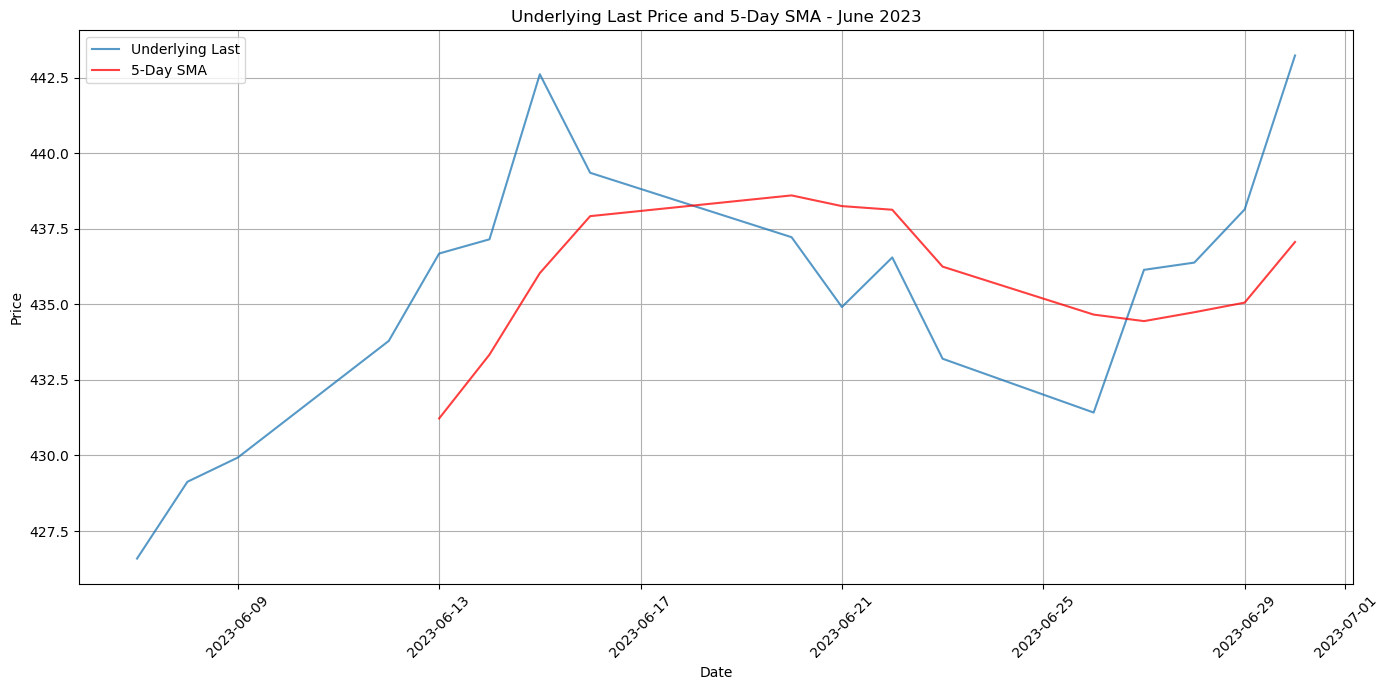

In [19]:
# Calculate the 5-Day SMA
merged_data_june_2023['SMA'] = merged_data_june_2023['UNDERLYING_LAST'].rolling(window=5).mean()

plt.figure(figsize=(14, 7))
plt.plot(merged_data_june_2023['Date'], merged_data_june_2023['UNDERLYING_LAST'], label='Underlying Last', alpha=0.75)
plt.plot(merged_data_june_2023['Date'], merged_data_june_2023['SMA'], label='5-Day SMA', color='red', alpha=0.75)

plt.title('Underlying Last Price and 5-Day SMA - June 2023')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


During June 2023, the security exhibited a oscillated trend around its 5-Day SMA. 
Notably, a bullish sentiment was indicated by the Underlying Last Price predominantly maintaining a position above the SMA for the first half of the month. 
The market encountered volatility as reflected by the increased frequency and magnitude of crossovers between the price and SMA lines mid-month.

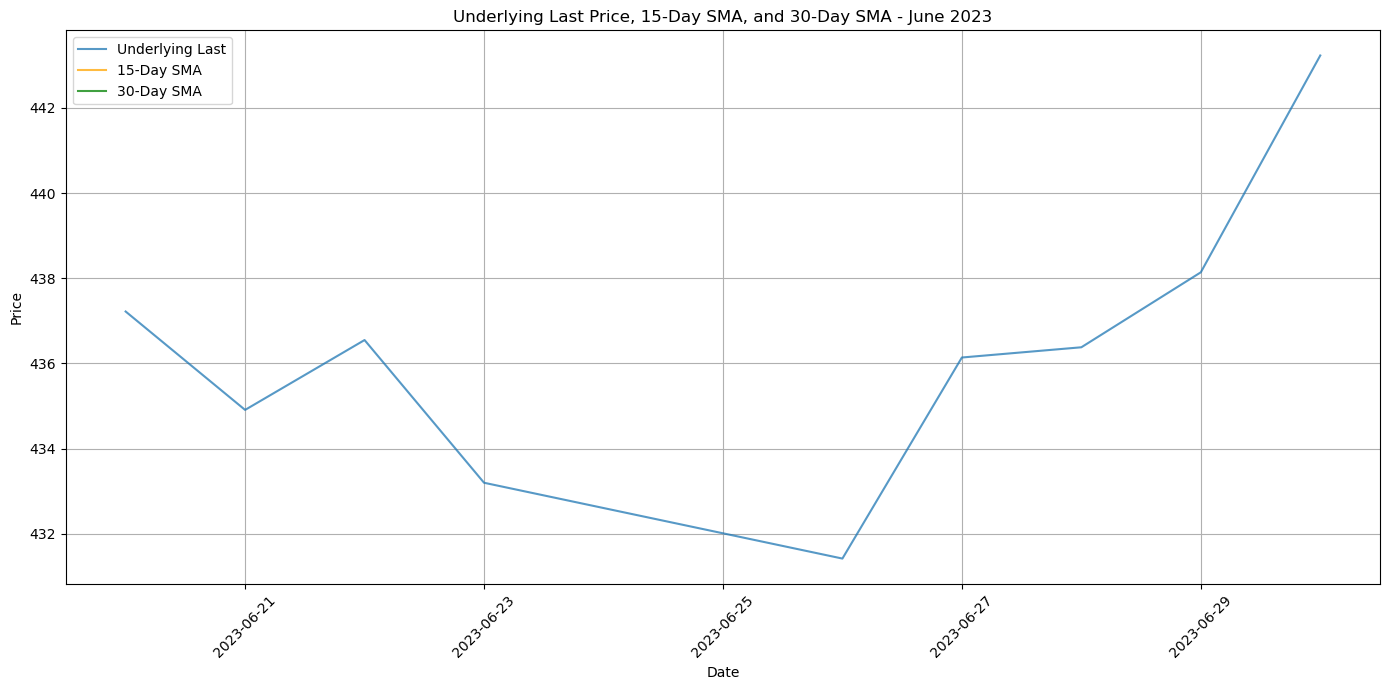

In [51]:
# Assuming merged_data_june_2023 contains 'UNDERLYING_LAST' prices and 'Date'

# Calculate the 15-Day and 30-Day SMA
merged_data_june_2023['15-Day SMA'] = merged_data_june_2023['UNDERLYING_LAST'].rolling(window=15).mean()
merged_data_june_2023['30-Day SMA'] = merged_data_june_2023['UNDERLYING_LAST'].rolling(window=30).mean()

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(merged_data_june_2023['Date'], merged_data_june_2023['UNDERLYING_LAST'], label='Underlying Last', alpha=0.75)
plt.plot(merged_data_june_2023['Date'], merged_data_june_2023['15-Day SMA'], label='15-Day SMA', color='orange', alpha=0.75)
plt.plot(merged_data_june_2023['Date'], merged_data_june_2023['30-Day SMA'], label='30-Day SMA', color='green', alpha=0.75)

plt.title('Underlying Last Price, 15-Day SMA, and 30-Day SMA - June 2023')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


In [49]:

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop('target.csv', axis=1))

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(scaled_features, data['target'], test_size=0.2, random_state=42)

# Polynomial features to capture interactions and non-linearities
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Train a Ridge regression model with hyperparameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-3, 1e-2, 1e-1, 1, 10, 100]}
grid_search = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train_poly, y_train)

# Train a Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Train a Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, random_state=42)
gbr.fit(X_train, y_train)

# Make predictions with the best Ridge model, Random Forest, and Gradient Boosting
best_ridge_model = grid_search.best_estimator_
ridge_pred = best_ridge_model.predict(X_test_poly)
rf_pred = rf.predict(X_test)
gbr_pred = gbr.predict(X_test)

# Calculate MSE and R² for the Ridge model
ridge_mse = mean_squared_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

# Calculate MSE and R² for the Random Forest model
rf_mse = mean_squared_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

# Calculate MSE and R² for the Gradient Boosting model
gbr_mse = mean_squared_error(y_test, gbr_pred)
gbr_r2 = r2_score(y_test, gbr_pred)

print(f'Ridge MSE: {ridge_mse:.3f}, R-squared: {ridge_r2:.3f}')
print(f'Random Forest MSE: {rf_mse:.3f}, R-squared: {rf_r2:.3f}')
print(f'Gradient Boosting MSE: {gbr_mse:.3f}, R-squared: {gbr_r2:.3f}')


NameError: name 'data' is not defined